In [13]:
source("common.R")

df <-
  read_csv("data/tidy_ons_longcovid.csv", show_col_types = F)

df%>%
  group_by(Domain)%>%
  summarise()

Domain
<chr>
Age group
All people
Country/region
Duration since first (suspected) coronavirus infection
Employment sector
Employment status - broad (16+ population only)
Employment status - detailed (16+ population only)
Ethnic group
Health/disability status


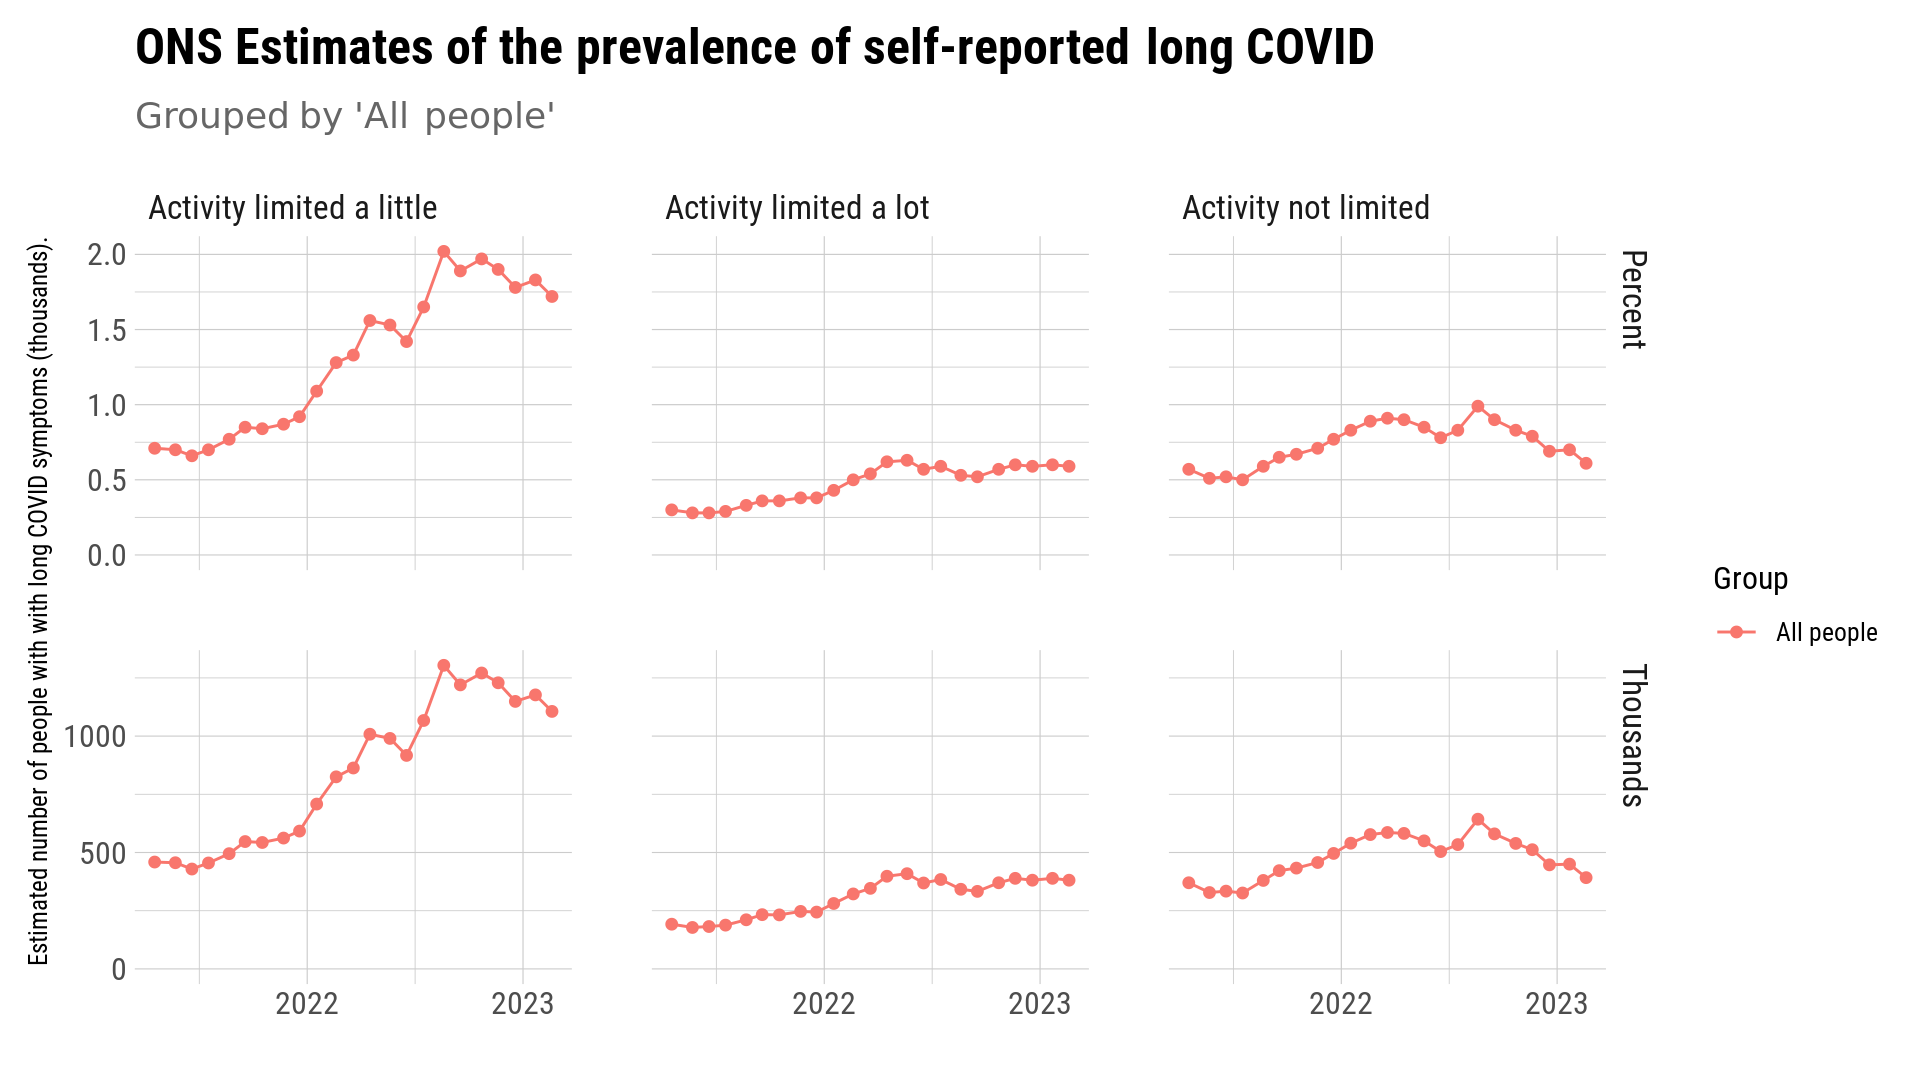

In [2]:
s = 1.2
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

plot <- function(domain){
  df%>%
    filter(domain == Domain)%>%
    ggplot(aes(x = midpoint_date, y = Estimate, color = Group)) +
    labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
         subtitle = paste0("Grouped by '", domain, "'"),
         y = "Estimated number of people with with long COVID symptoms (thousands).",
         x = "", y = "") +
    geom_line() +
    geom_point() +
    scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
    scale_y_continuous(lim = c(0, NA)) +
    facet_grid(Unit~`Impact on daily activity`, scale = "free_y")
}
plot("All people")

Warning message:
“Removed 38 rows containing missing values (`geom_point()`).”


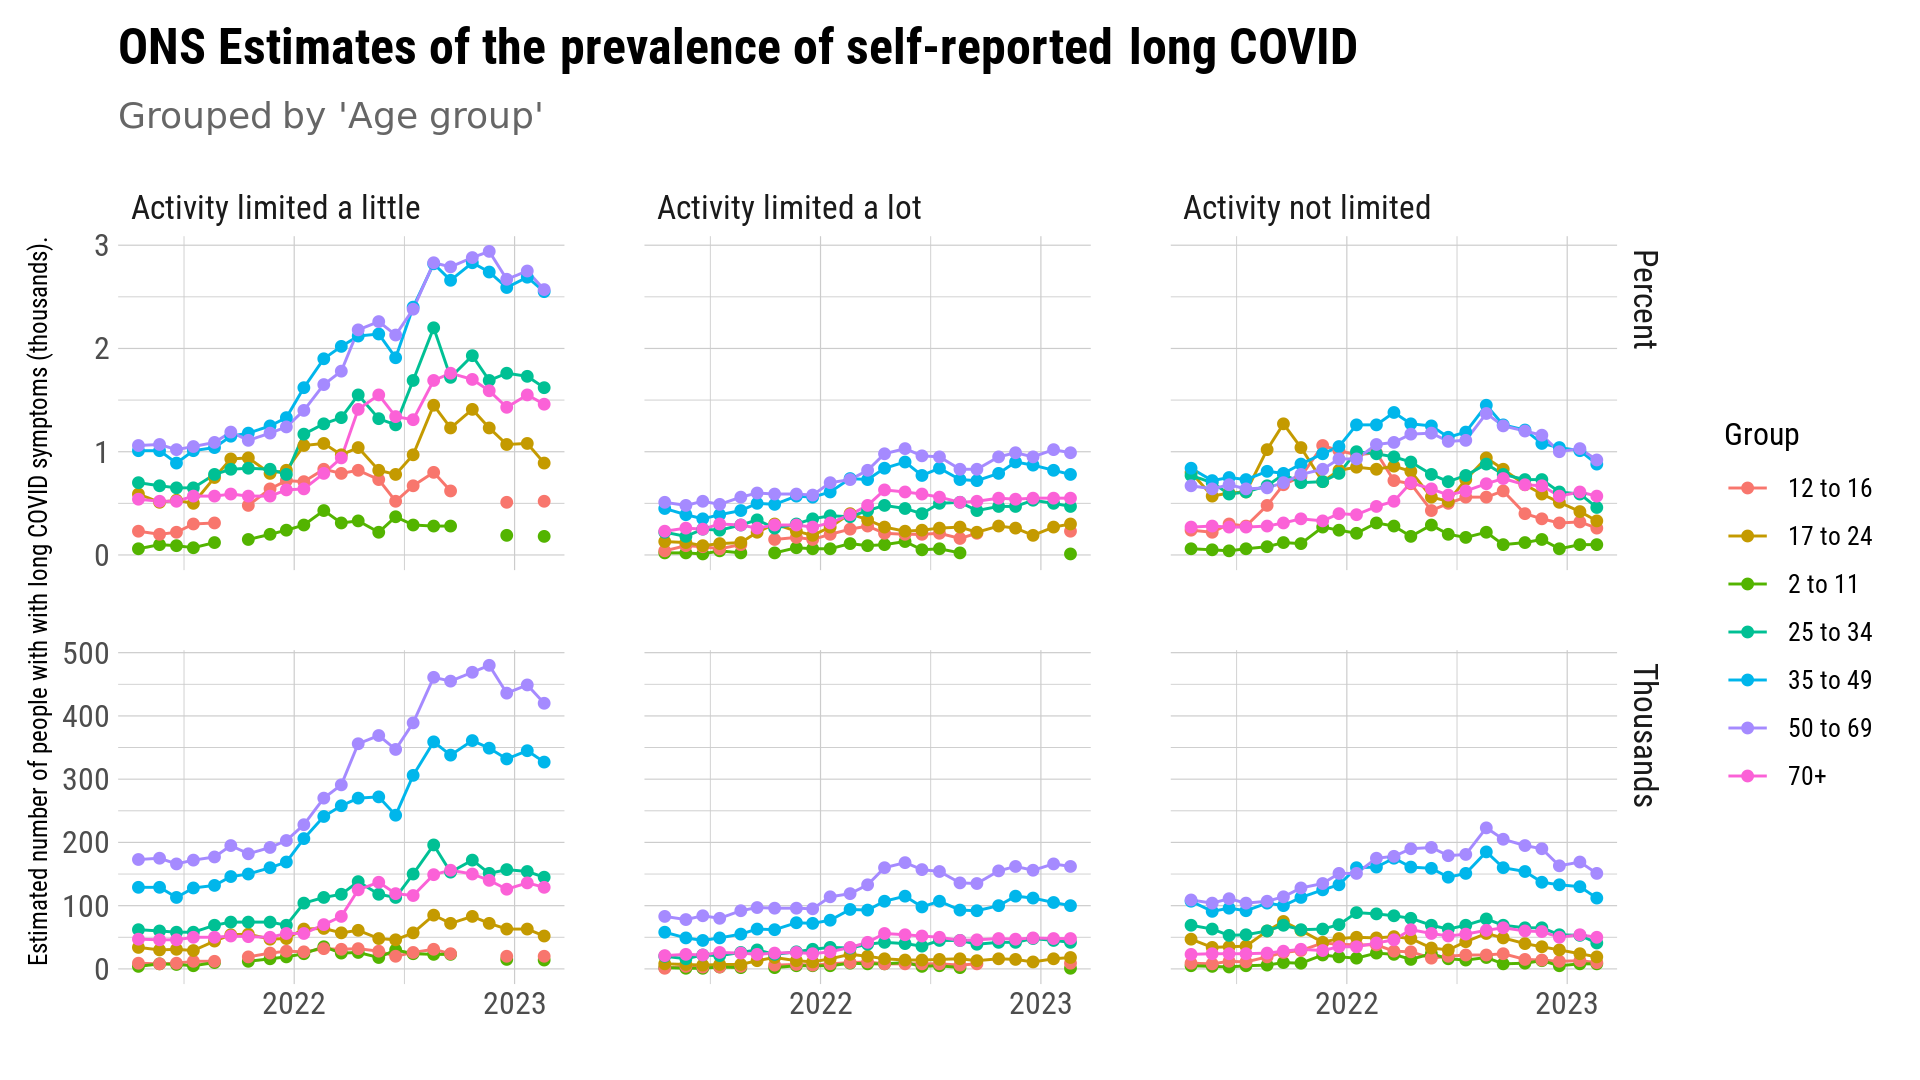

In [3]:
plot("Age group")

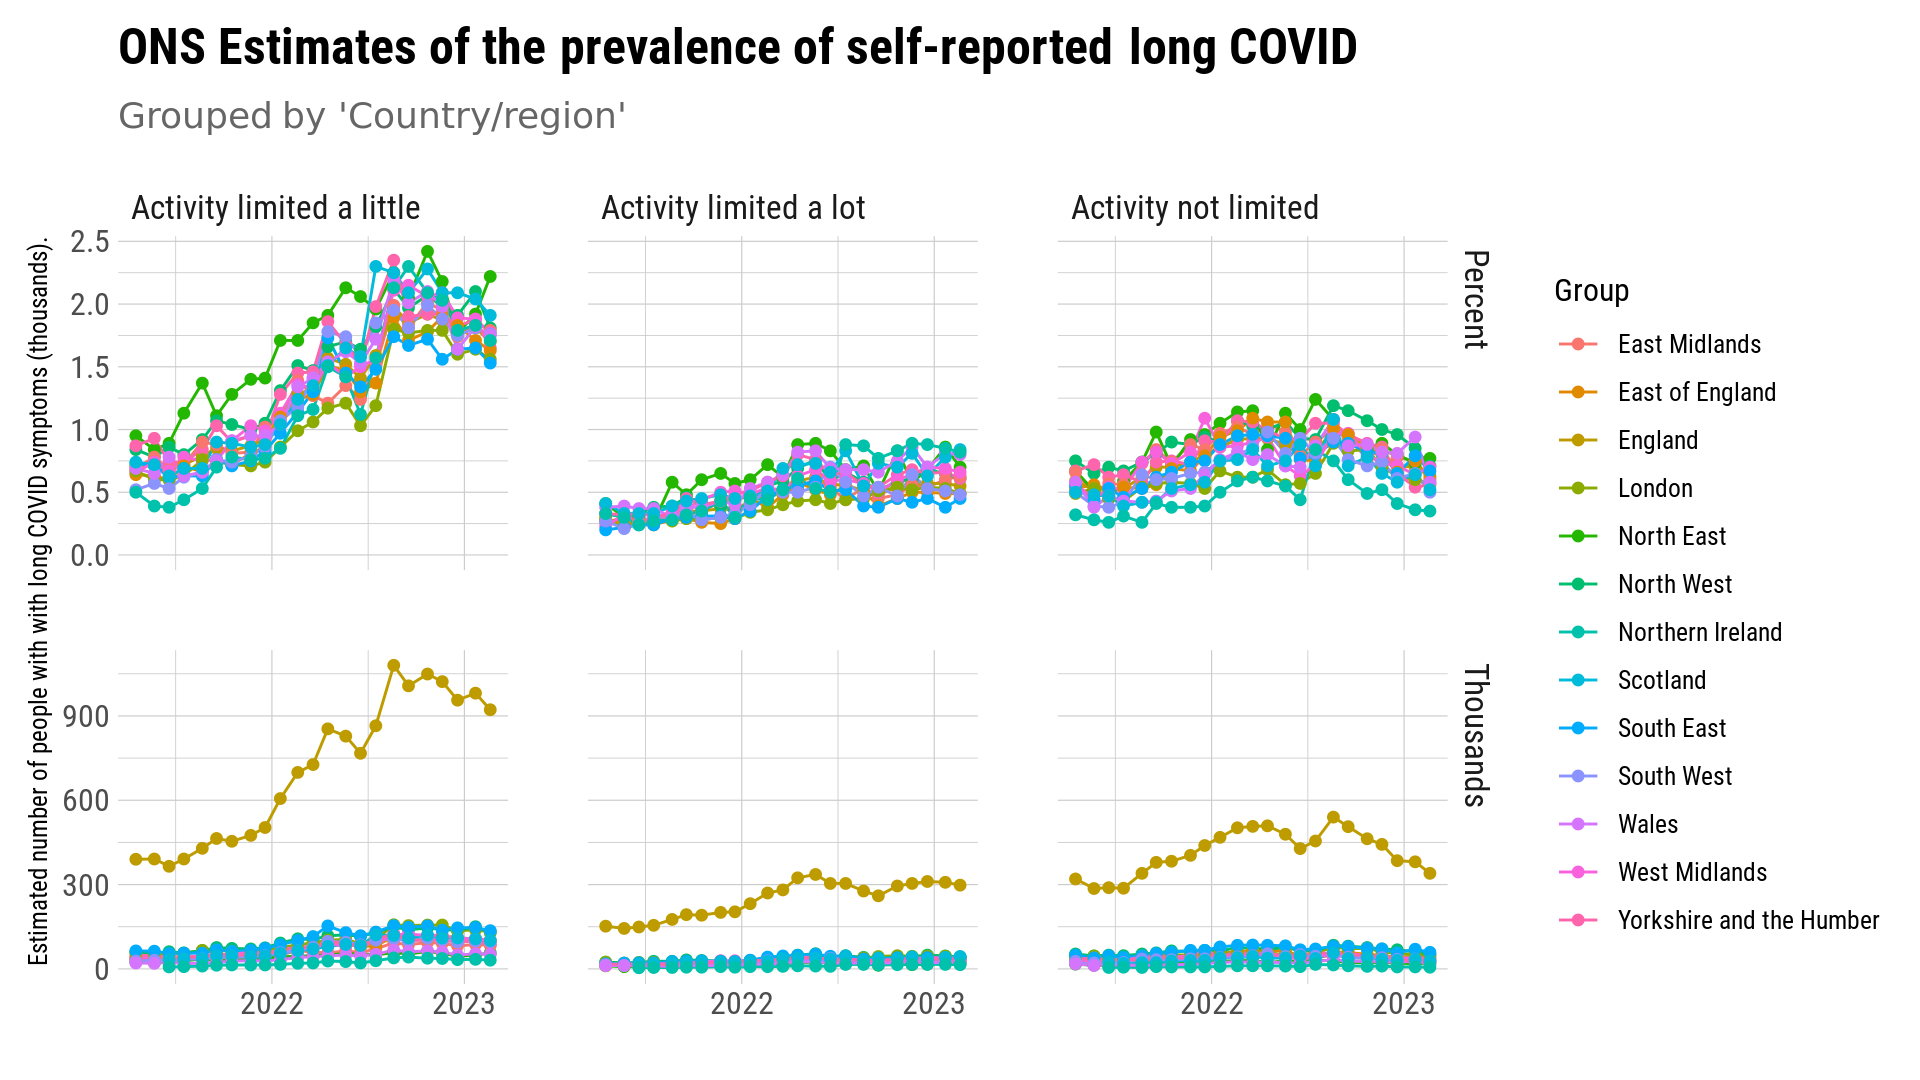

In [4]:
plot("Country/region")

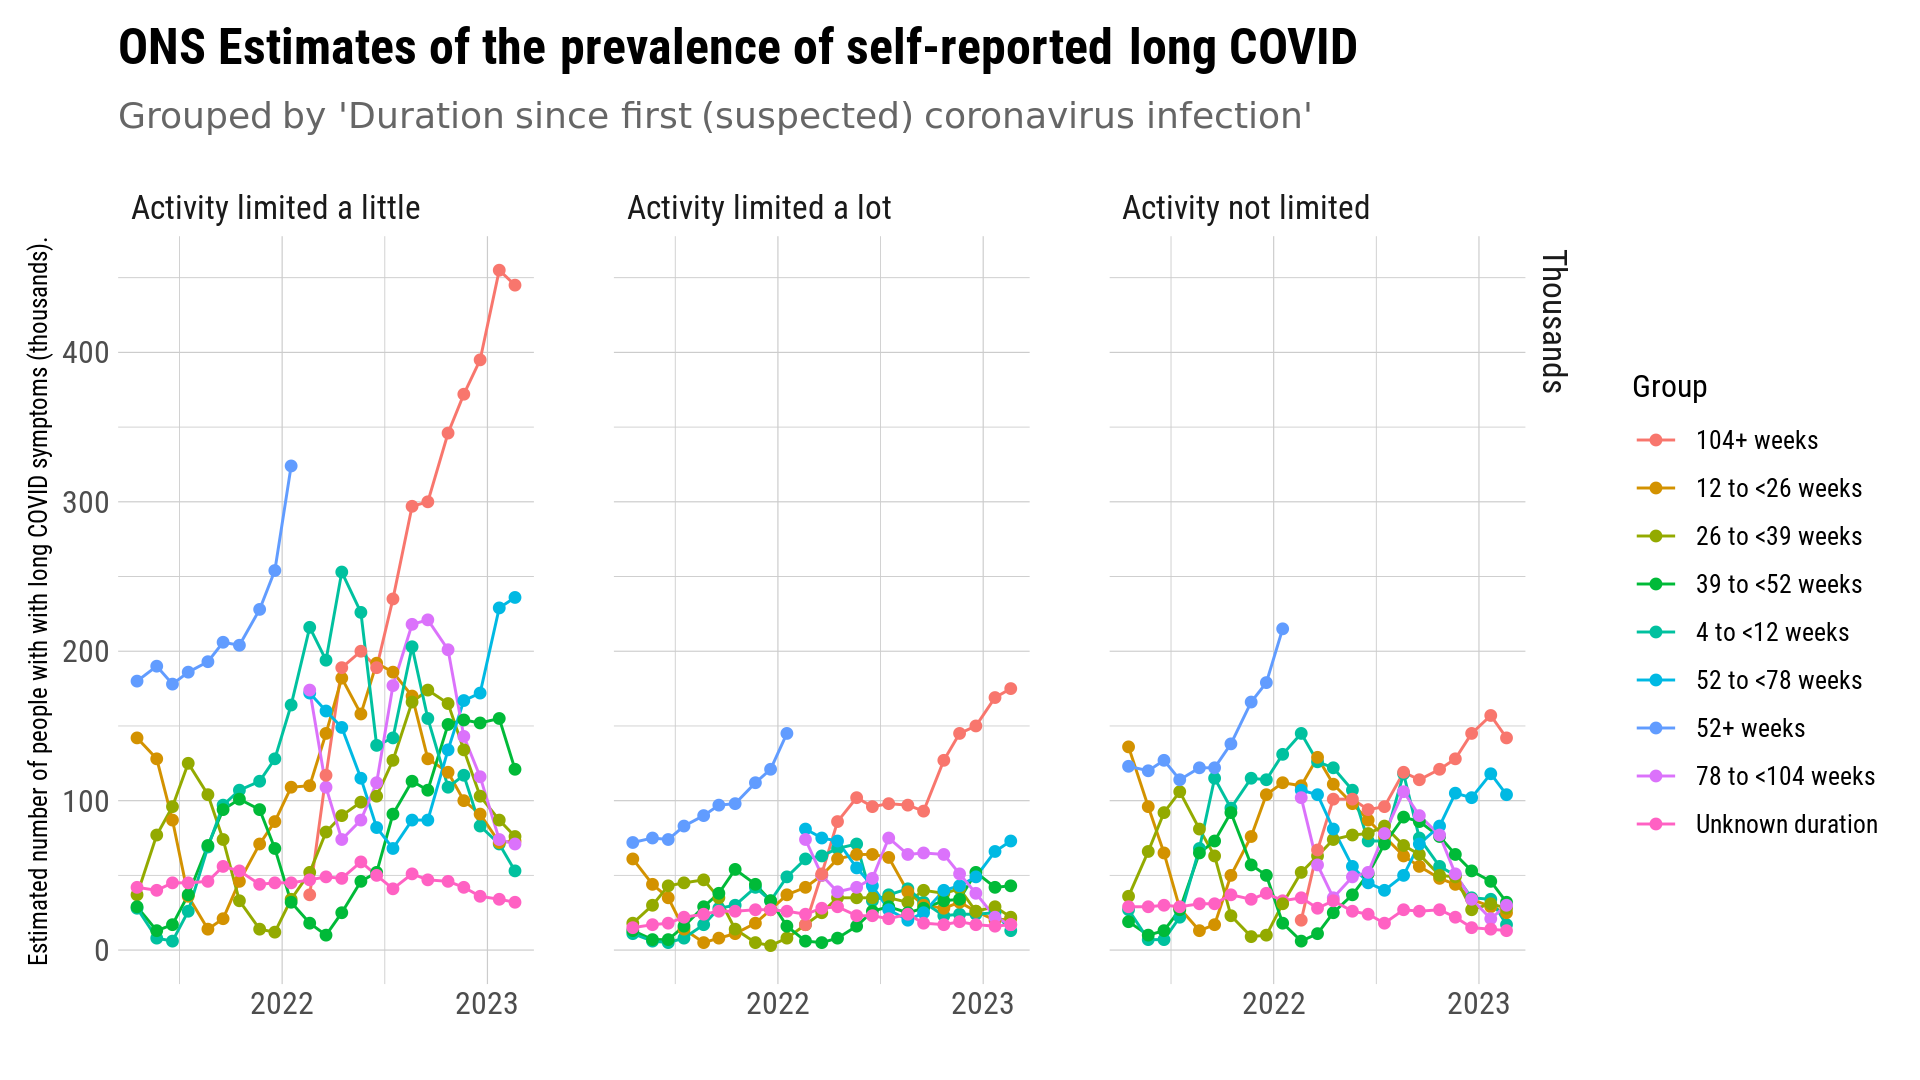

In [5]:
plot("Duration since first (suspected) coronavirus infection")

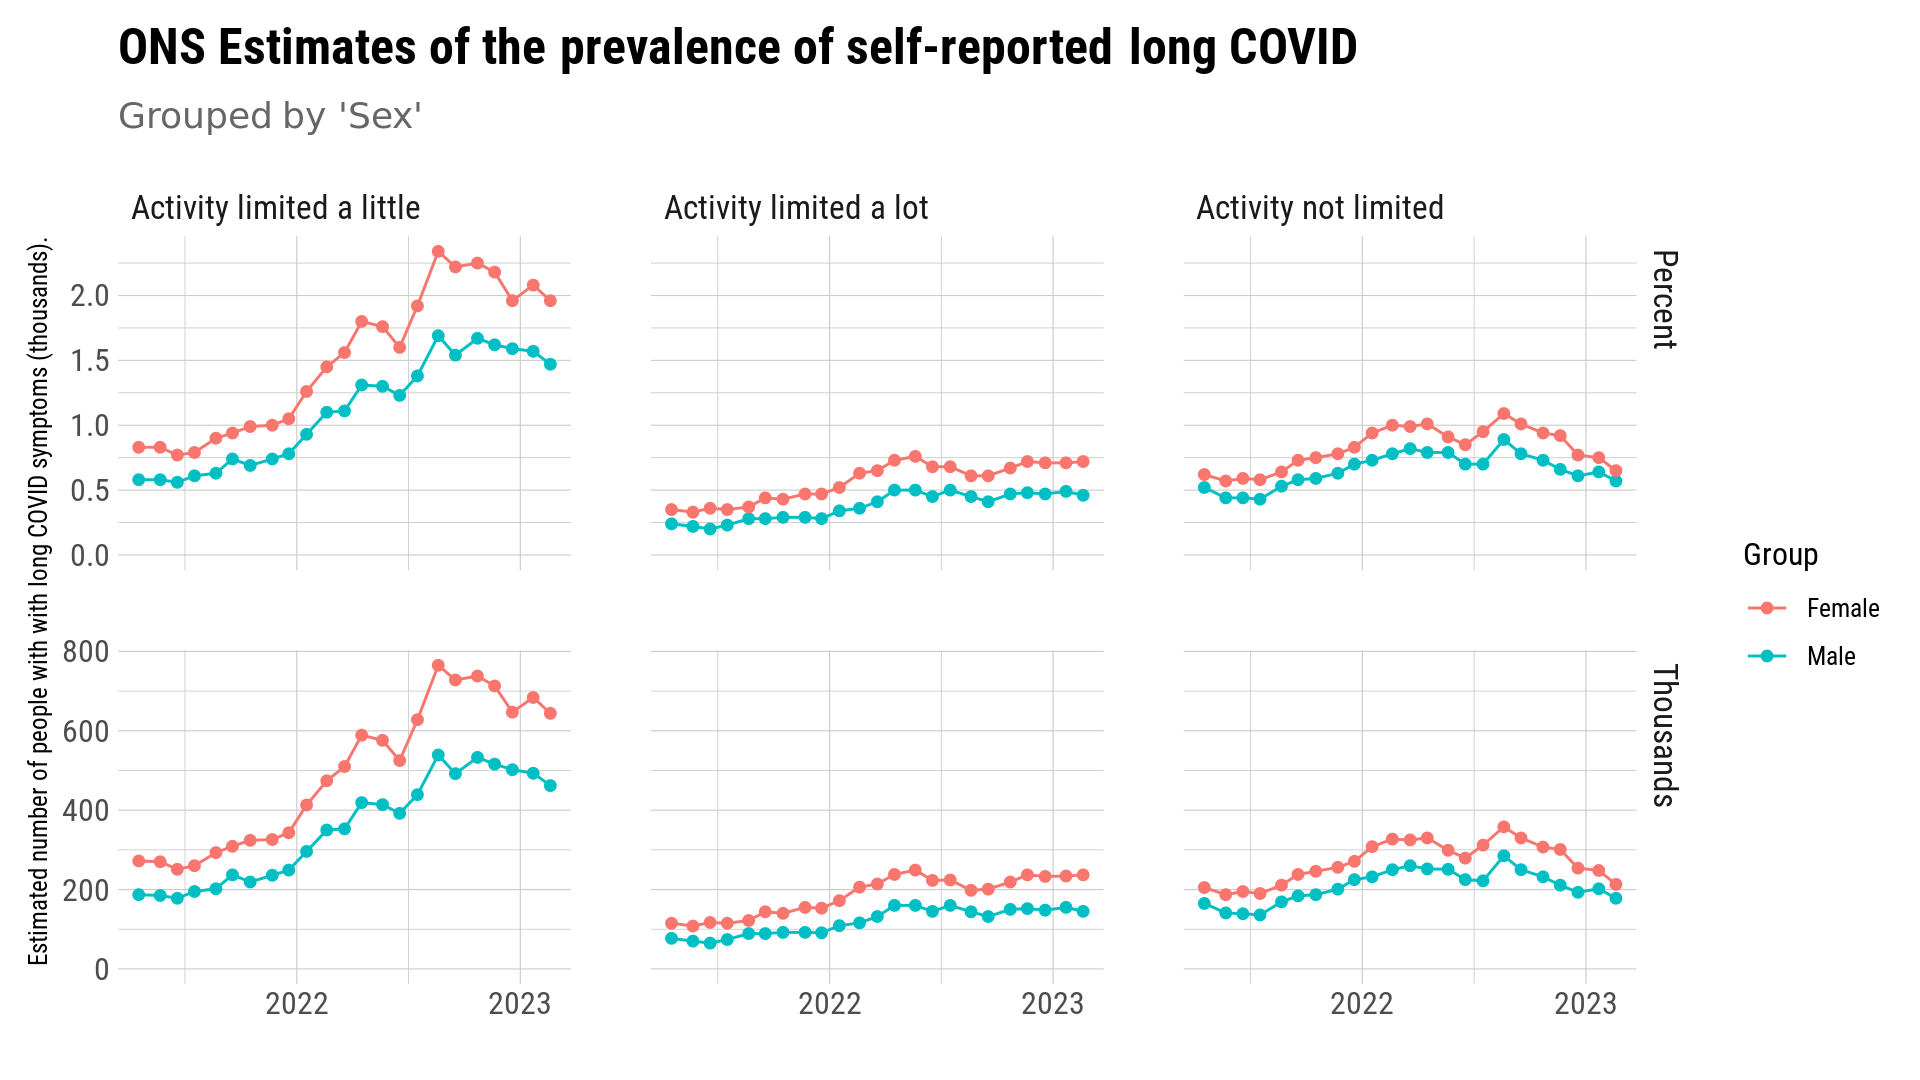

In [6]:
plot("Sex")

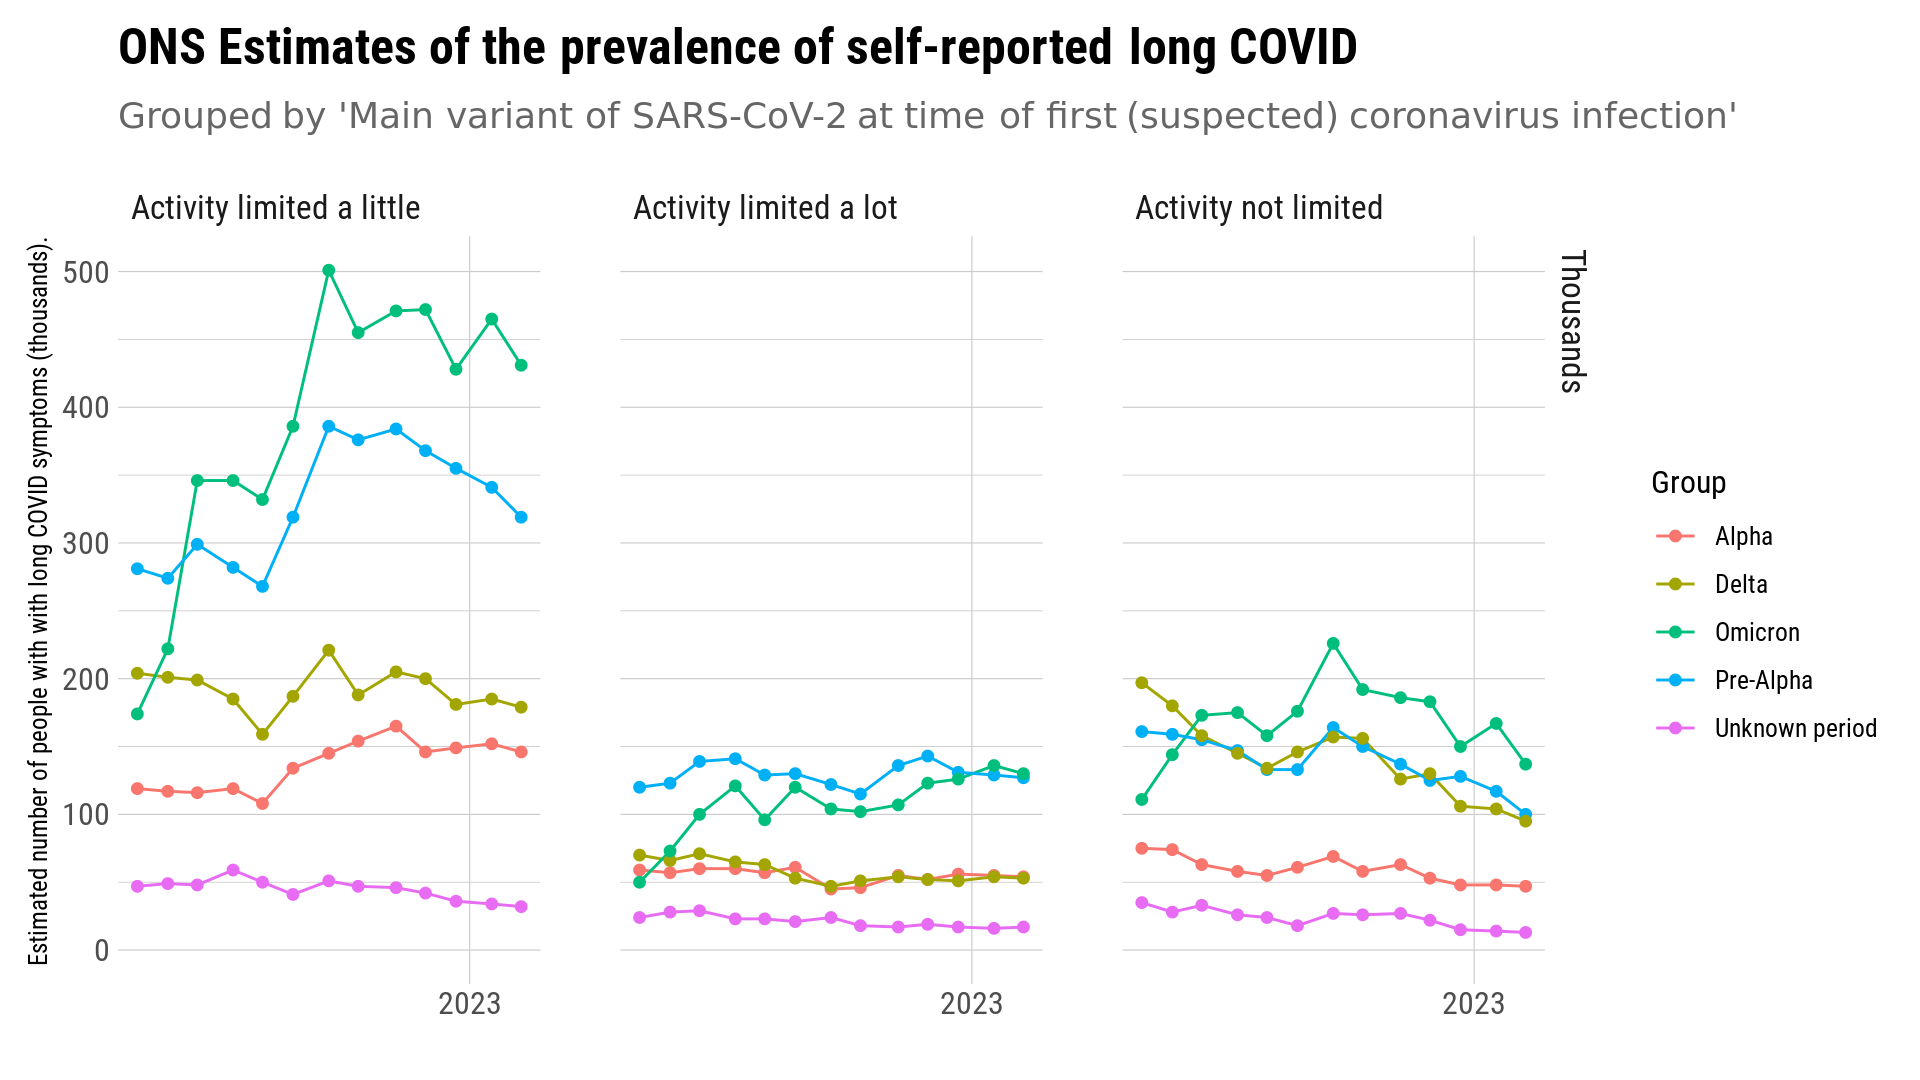

In [7]:
plot("Main variant of SARS-CoV-2 at time of first (suspected) coronavirus infection")

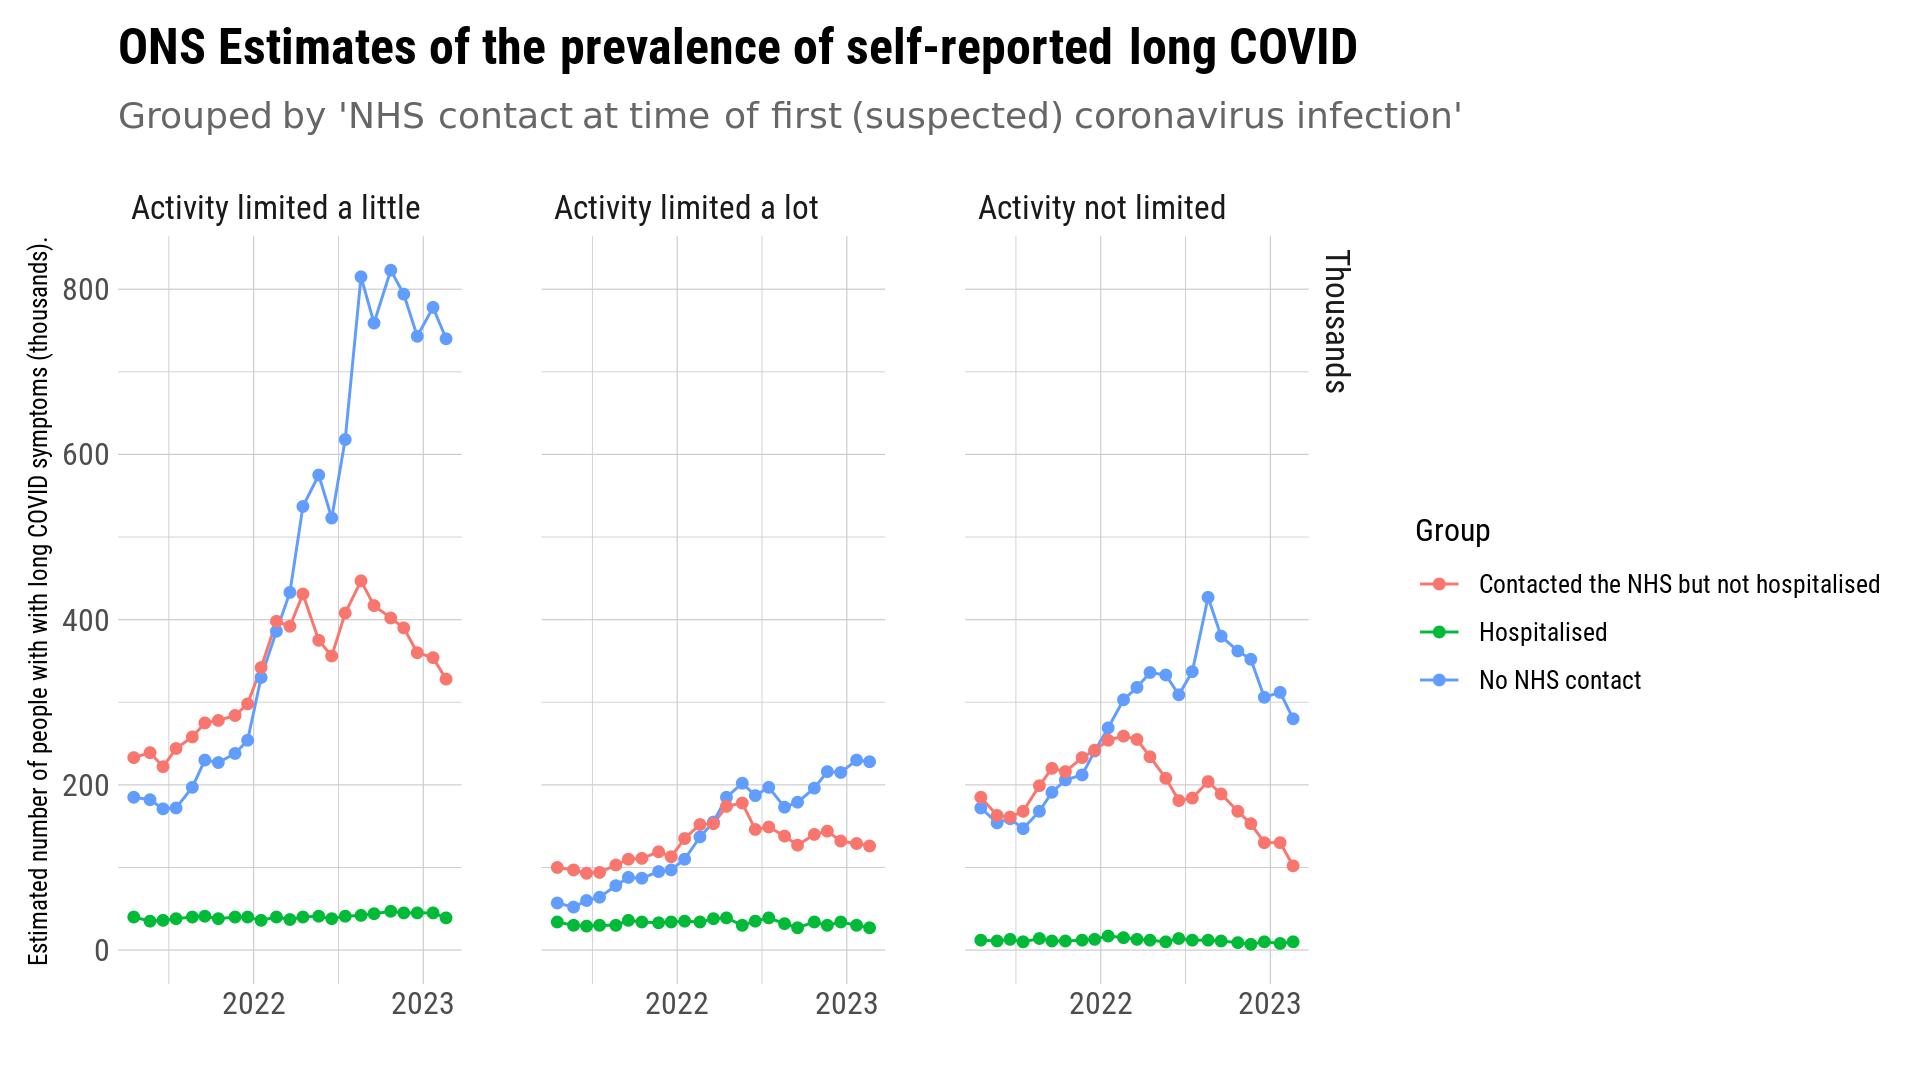

In [8]:
plot("NHS contact at time of first (suspected) coronavirus infection")

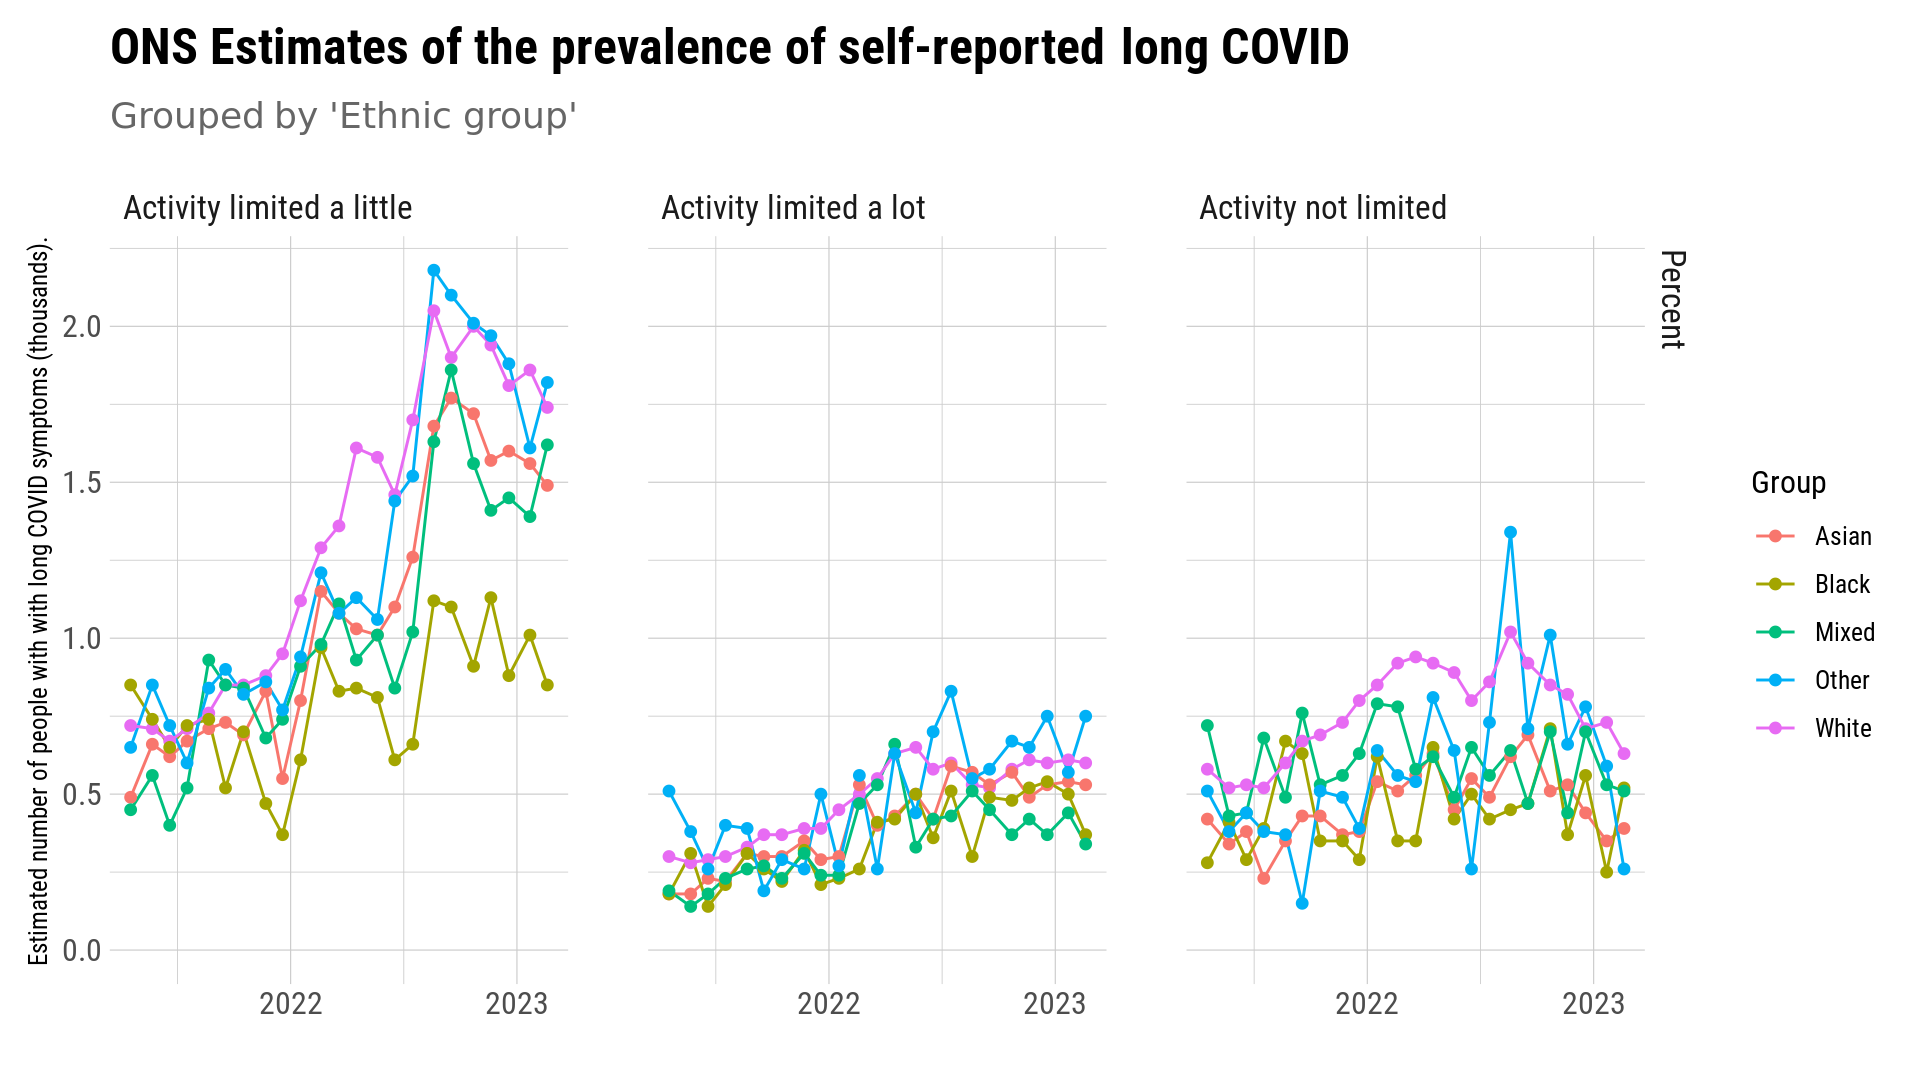

In [15]:
plot("Ethnic group")

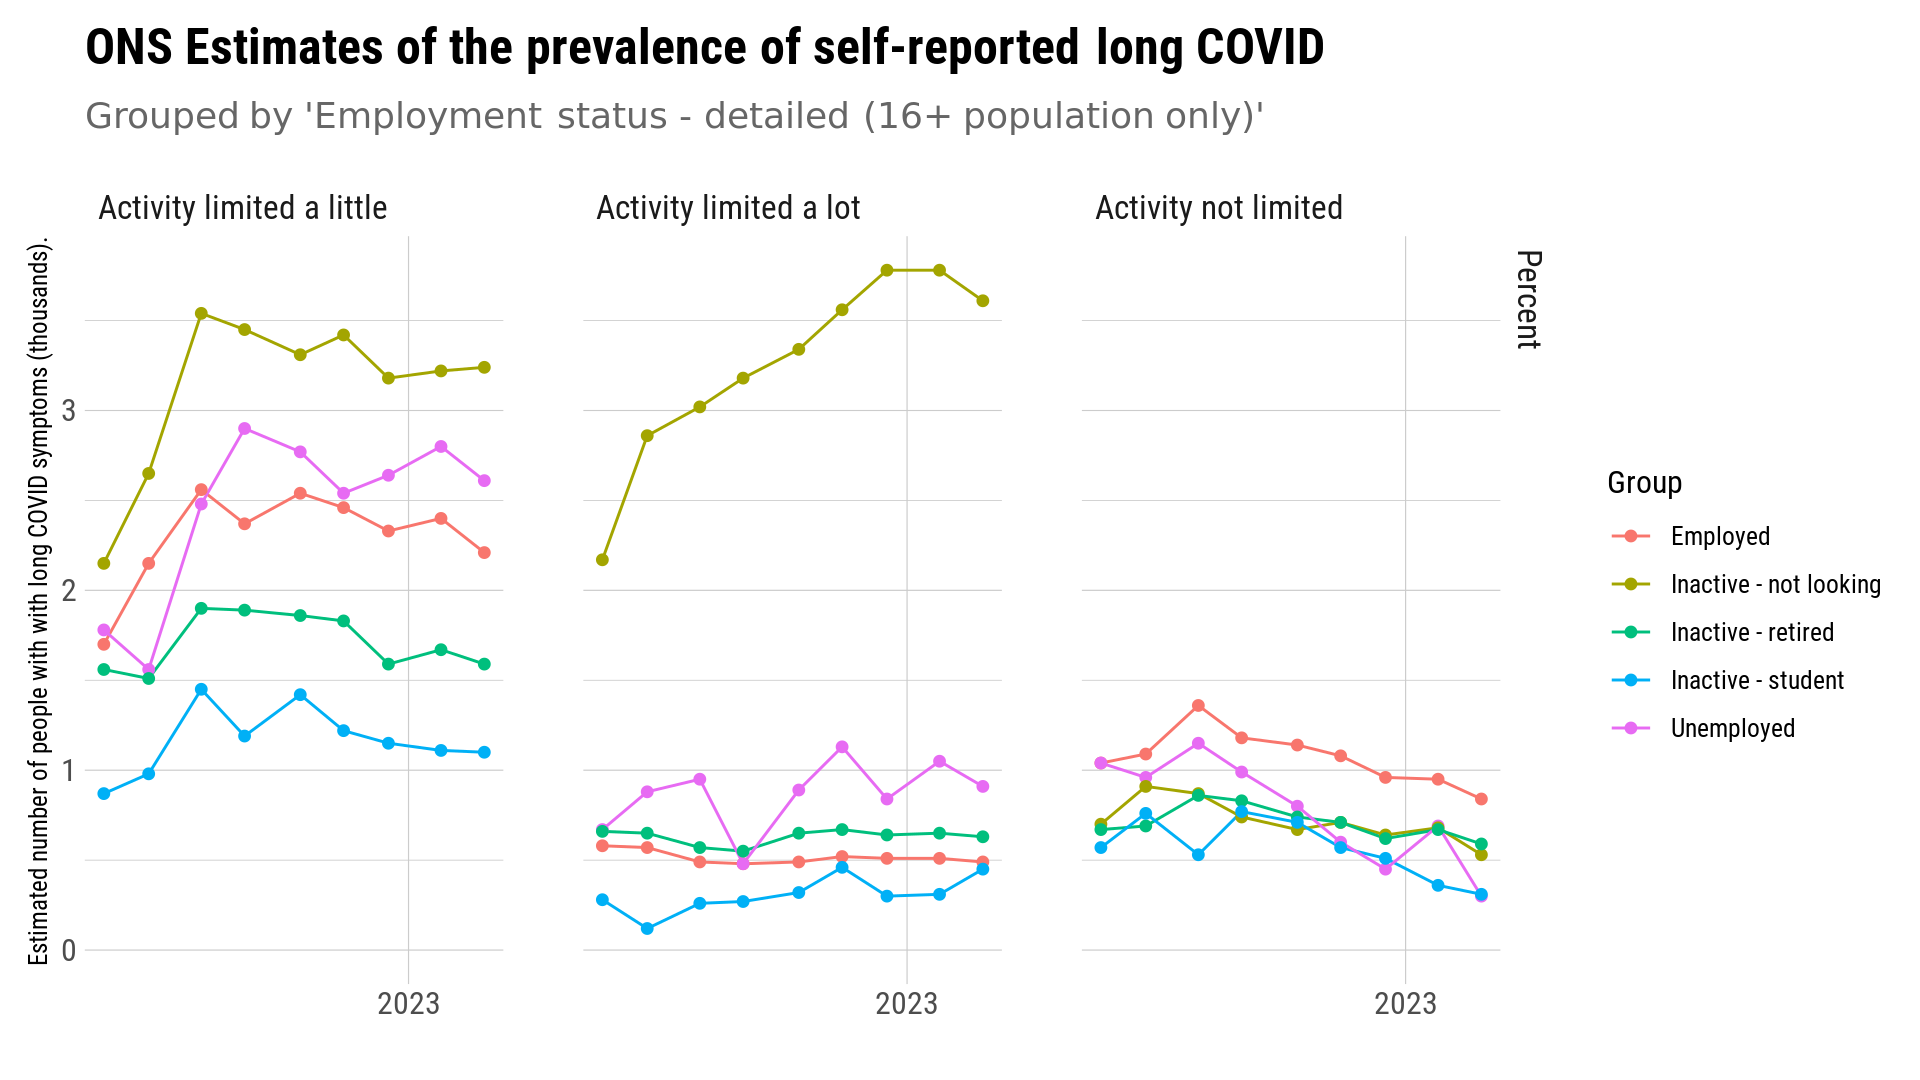

In [34]:
plot("Employment status - detailed (16+ population only)")

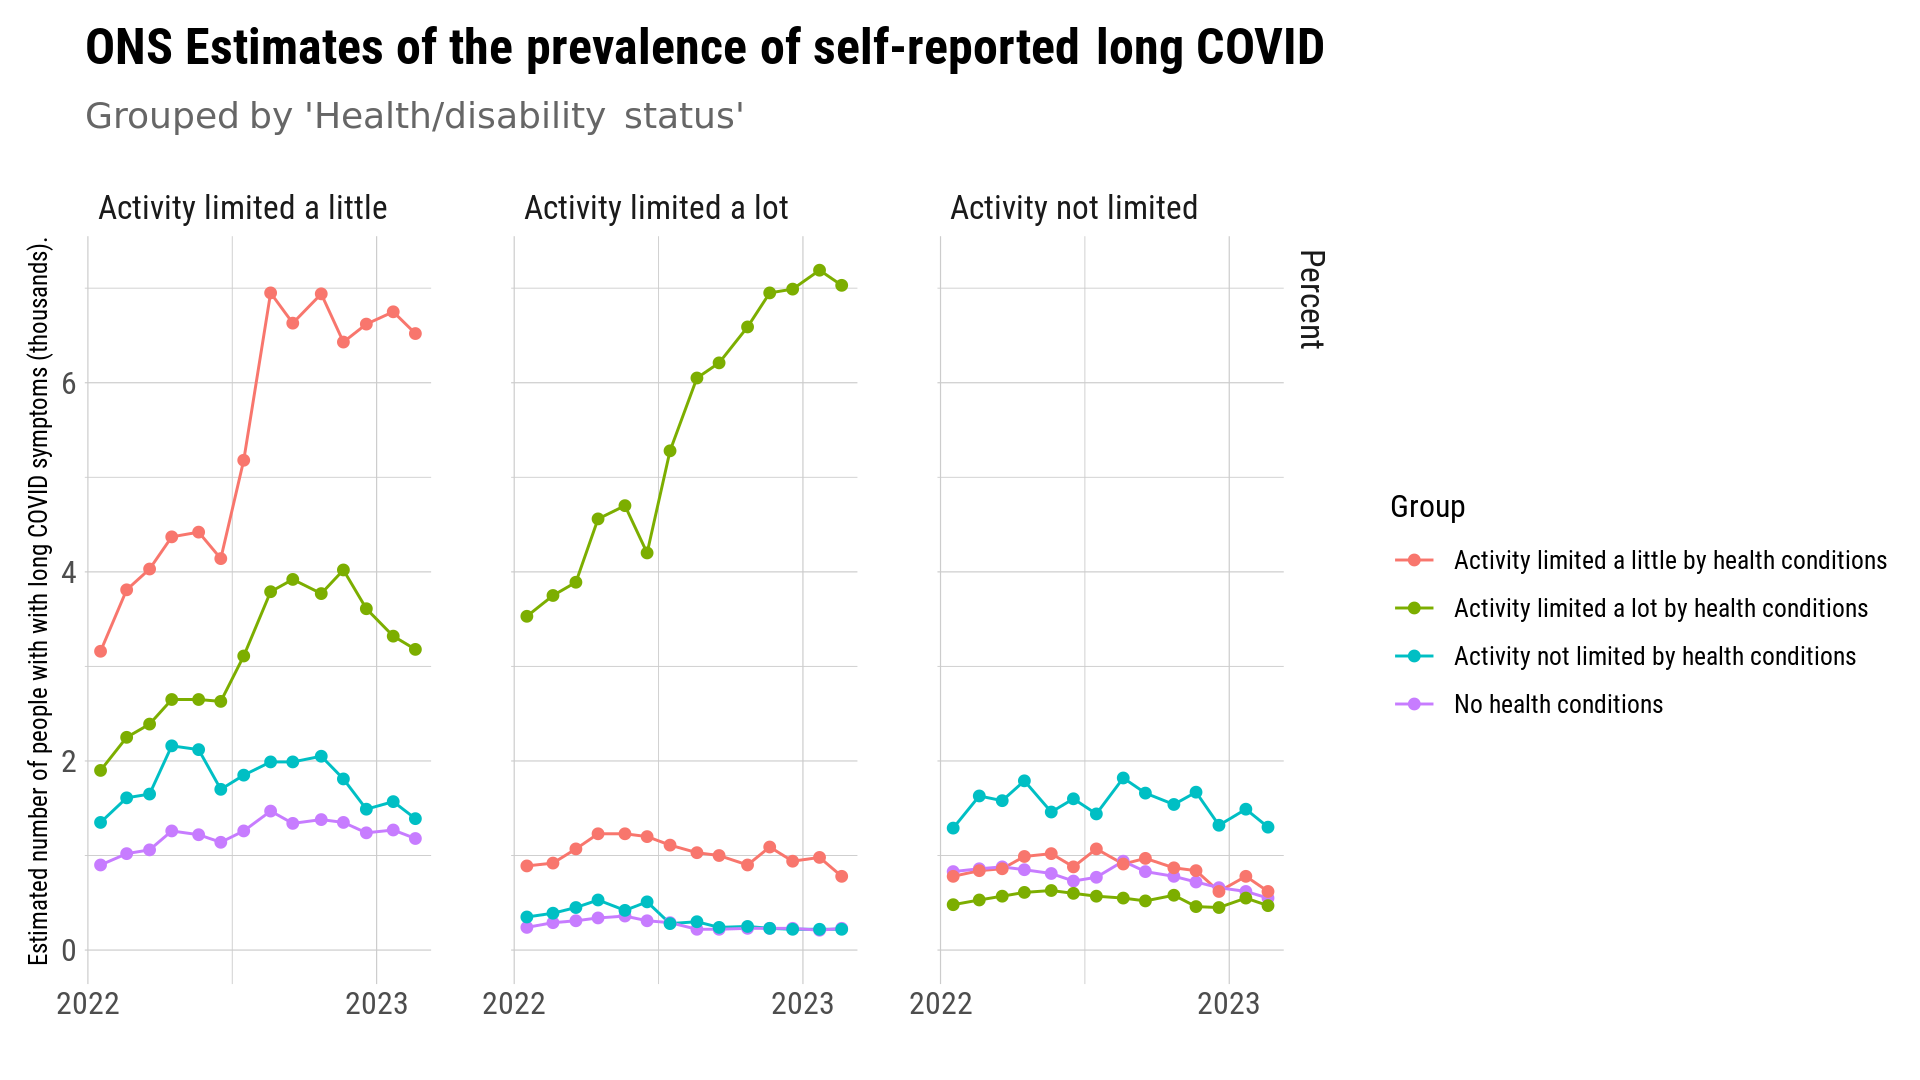

In [35]:
plot("Health/disability status")

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `group = parse_integer(Group)`.
Caused by warning:
! 6 parsing failures.
row col               expected            actual
295  -- no trailing characters 1 (most deprived)
299  -- no trailing characters 1 (most deprived)
303  -- no trailing characters 1 (most deprived)
307  -- no trailing characters 1 (most deprived)
311  -- no trailing characters 1 (most deprived)
... ... ...................... .................
See problems(...) for more details.”


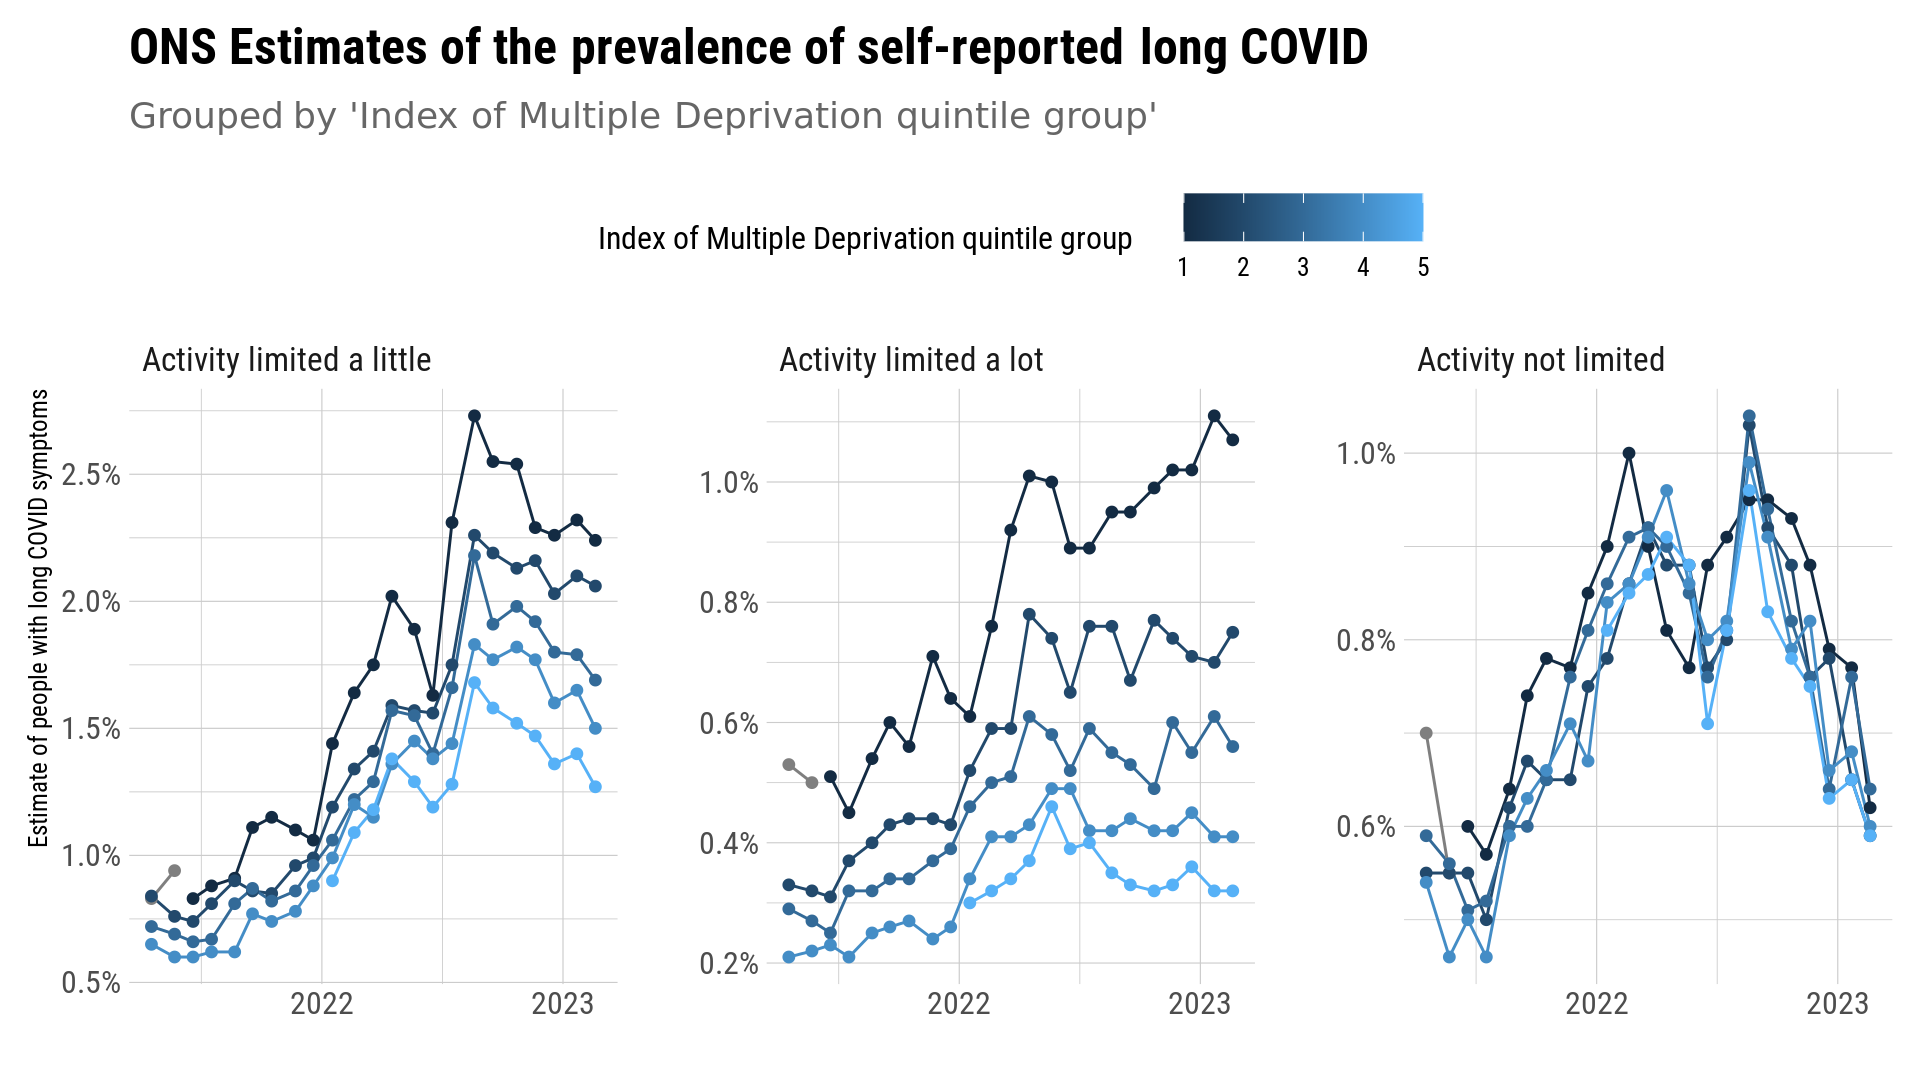

In [30]:
s = 1.2
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df%>%
filter("Index of Multiple Deprivation quintile group" == Domain)%>%
mutate(group = parse_integer(Group))%>%
ggplot(aes(x = midpoint_date, y = Estimate, color = group, group = group)) +
labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
     subtitle = paste0("Grouped by '", "Index of Multiple Deprivation quintile group", "'"),
     y = "Estimate of people with long COVID symptoms",
     x = "", y = "", color = "Index of Multiple Deprivation quintile group") +
geom_line() +
geom_point() +
scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
scale_y_continuous(labels = scales::percent_format(scale = 1)) +
facet_wrap(~`Impact on daily activity`, scale = "free_y") +
theme(legend.position = "top")


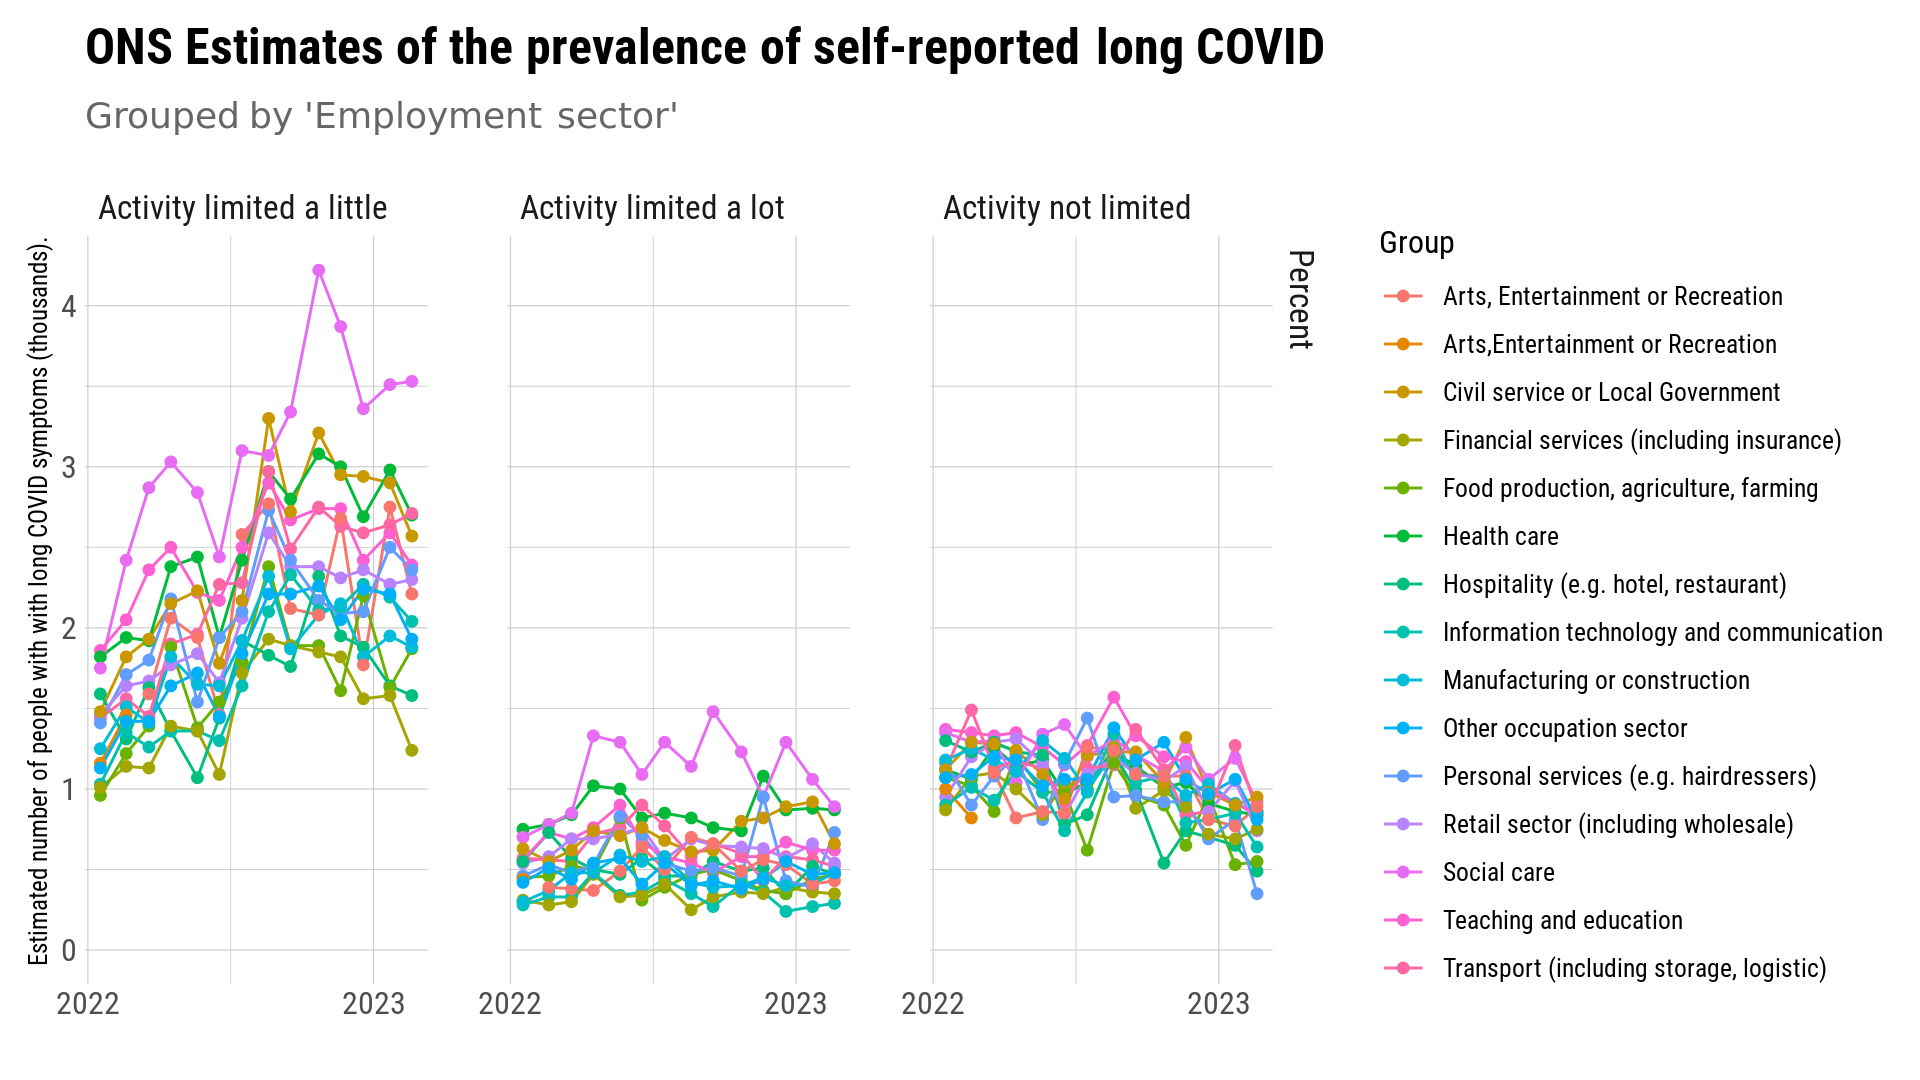

In [14]:
# Age group
# All people
# Country/region
# Duration since first (suspected) coronavirus infection
# Employment sector
# Employment status - broad (16+ population only)
# Employment status - detailed (16+ population only)
# Ethnic group
# Health/disability status
# Index of Multiple Deprivation quintile group
# Main variant of SARS-CoV-2 at time of first (suspected) coronavirus infection
# NHS contact at time of first (suspected) coronavirus infection
# Self-employment status (16+ population only)
# Sex
# Symptoms reported at time of first (suspected) infection
plot("Employment sector")

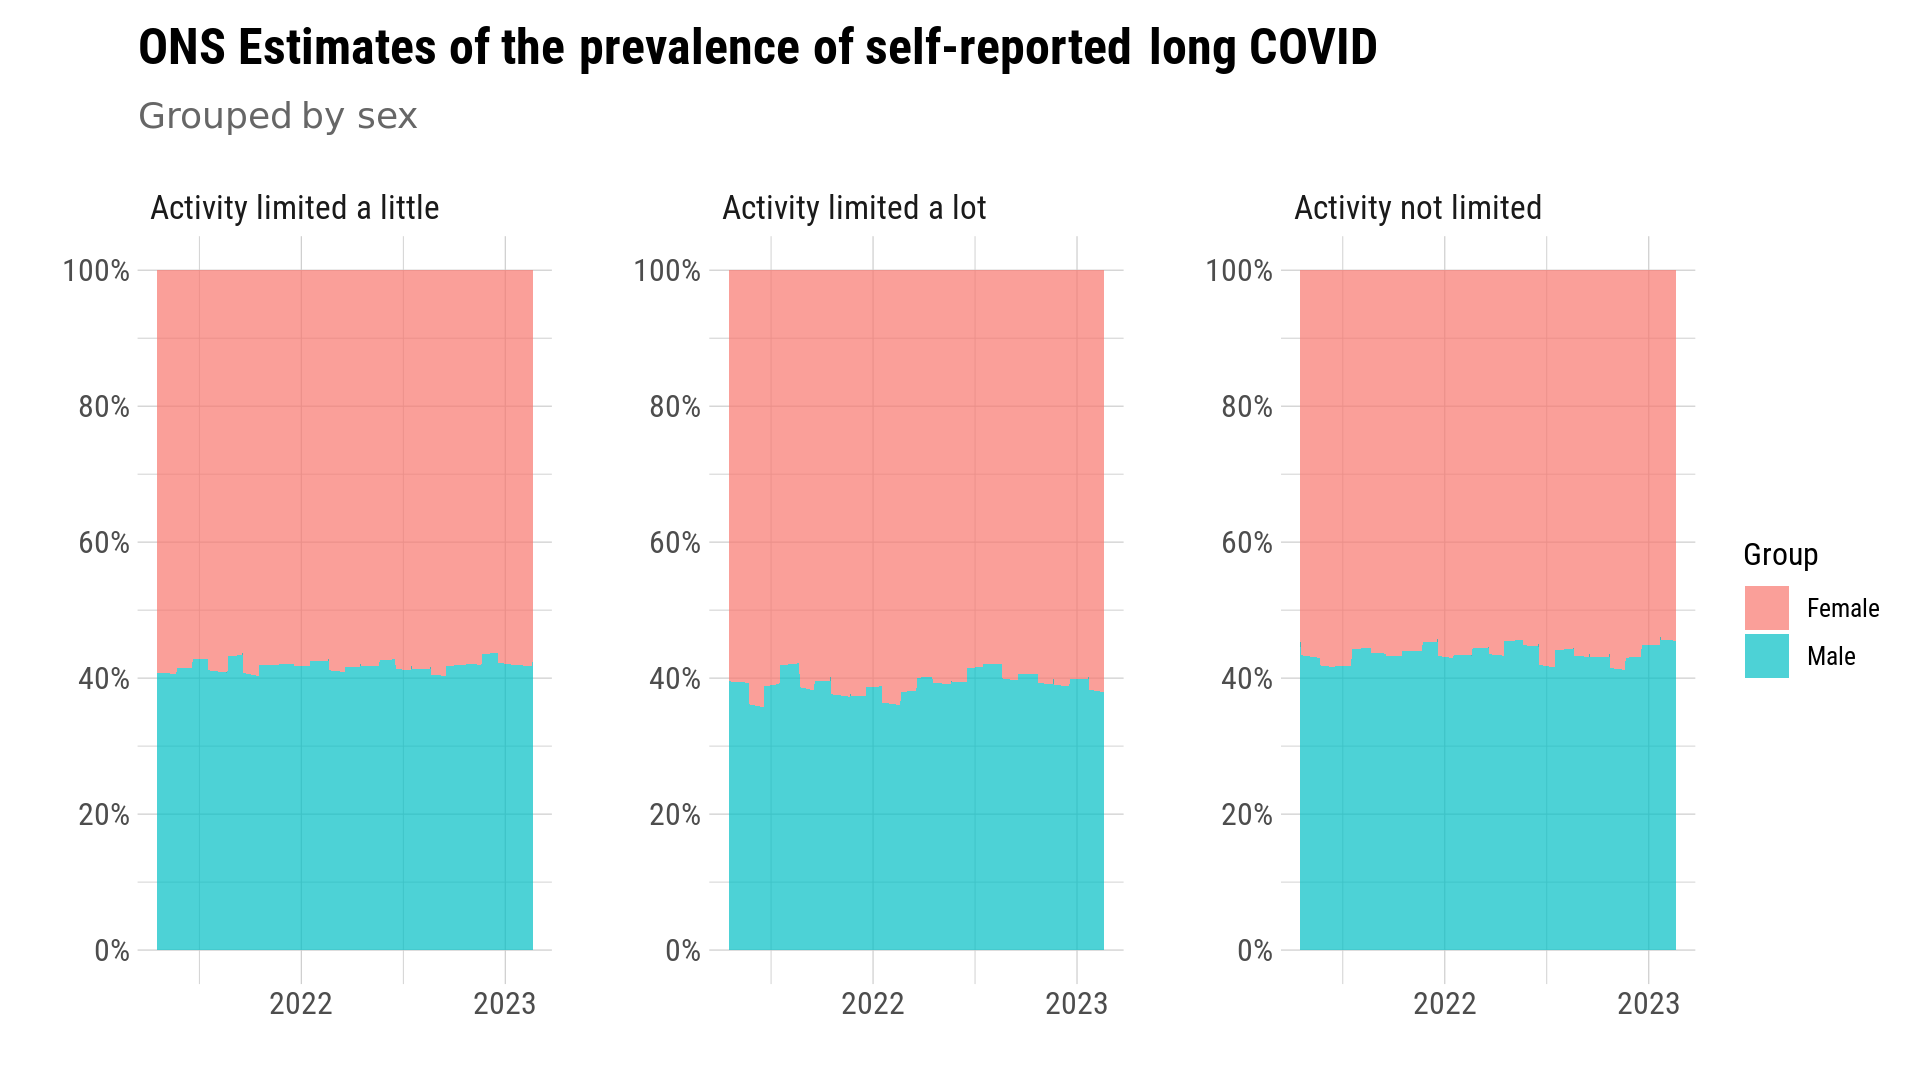

In [9]:
df%>%
    filter("Sex" == Domain)%>%
    ggplot(aes(x = midpoint_date, y = Estimate, fill = Group)) +
    labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
         subtitle = paste0("Grouped by sex"),
         y = "",
         x = "", y = "") +
    geom_area(position = "fill", alpha = 0.7) +
    scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
    scale_y_continuous(labels = scales::percent, breaks = seq(0, 1, 0.2)) +
    facet_wrap(~`Impact on daily activity`, scale = "free_y")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


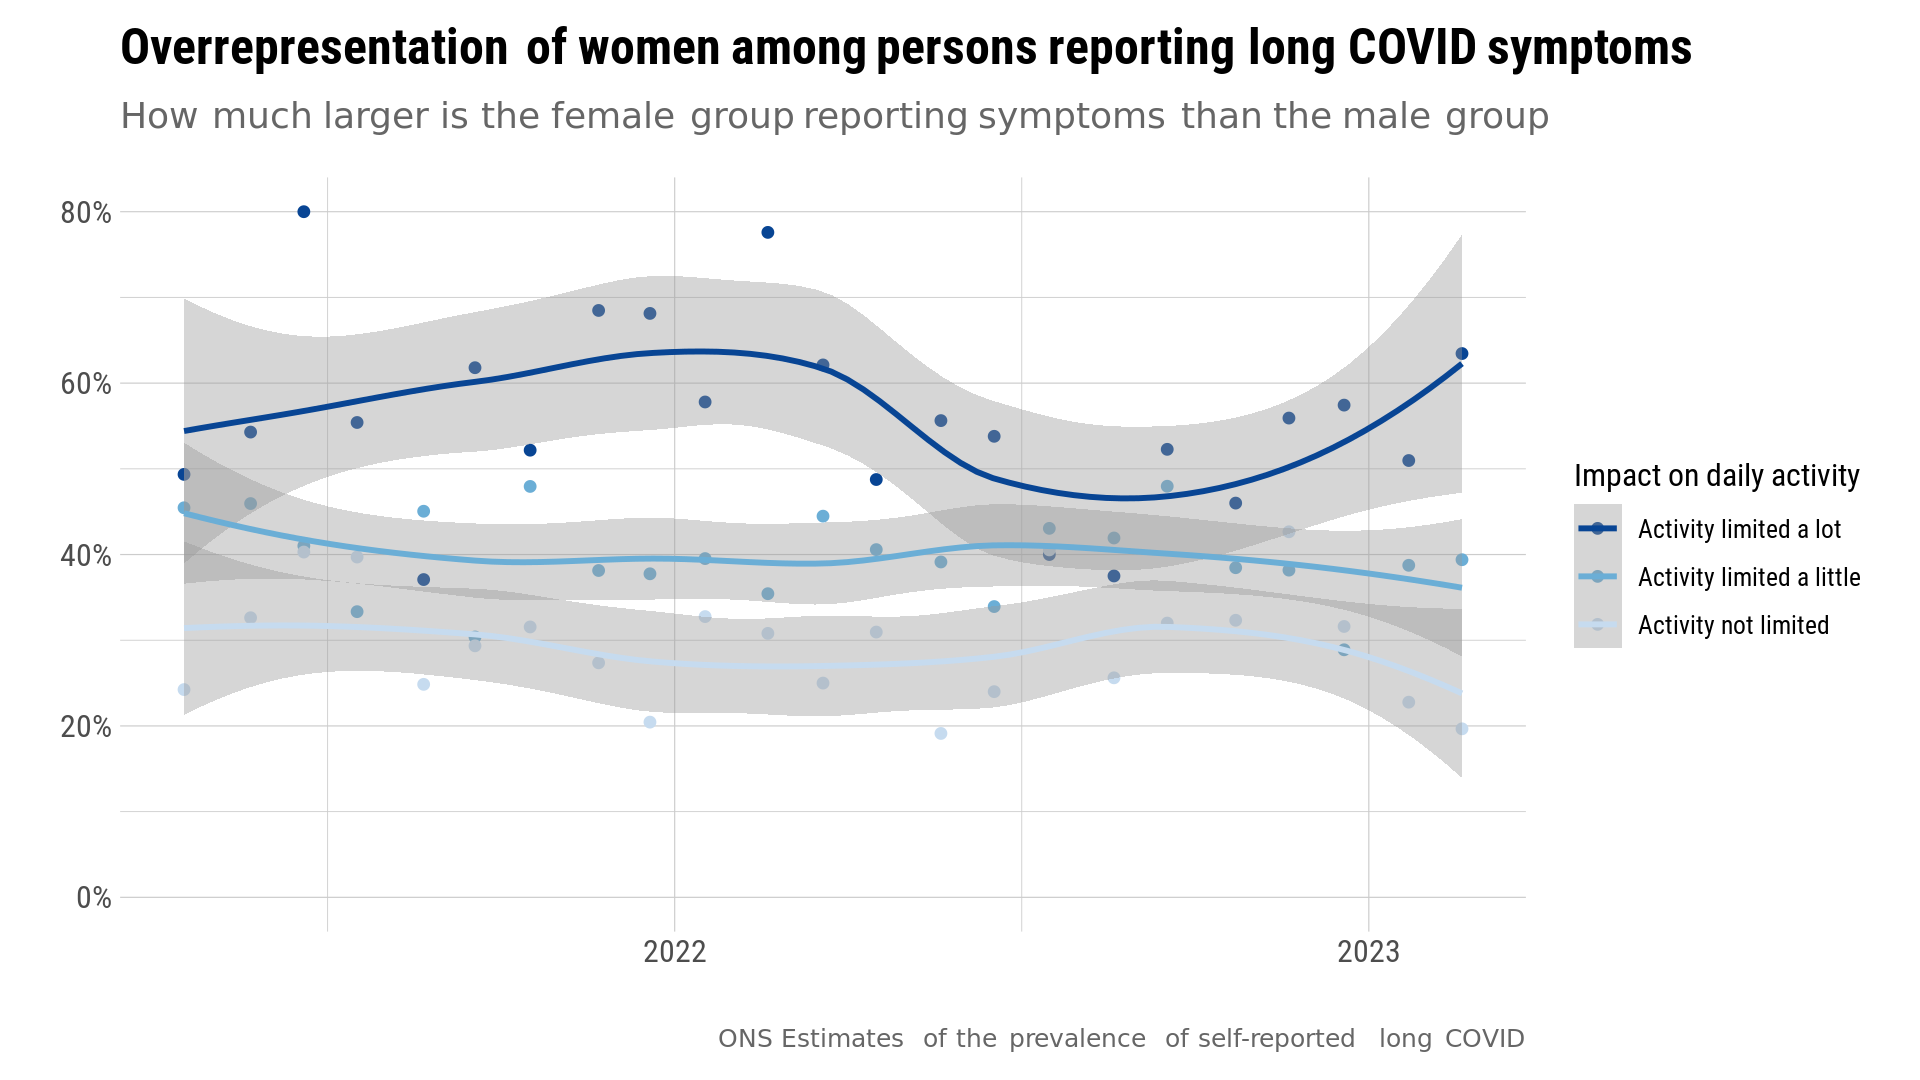

In [12]:
levels <- c("Activity not limited", "Activity limited a little", "Activity limited a lot")

pal <-c('#EFF3FF', '#C6DBEF', '#9ECAE1', '#6BAED6', '#4292C6', '#3181BD', '#2171B5', '#084594')

df%>%
  filter("Sex" == Domain)%>%
  filter(Unit == "Thousands")%>%
  mutate(`Impact on daily activity` = factor(`Impact on daily activity`, levels = rev(levels)))%>%
  select(midpoint_date, Group, Estimate, `Impact on daily activity`)%>%
  spread(Group, Estimate)%>%
  mutate(female_share = Female/Male-1)%>%
  ggplot(aes(x = midpoint_date, y = female_share, color = `Impact on daily activity`)) +
  labs(caption = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "How much larger is the female group reporting symptoms than the male group",
       title = "Overrepresentation of women among persons reporting long COVID symptoms",
      x = "", y = "") + 
  geom_point() +
  geom_smooth(se = T) +
  scale_color_manual(values = c('#084594', '#6BAED6', '#C6DBEF')) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(#lim = c(0.5, 0.7), 
                     lim = c(0, NA),
                     #breaks = seq(0, 1, 0.1),
                     labels = scales::percent)
#  geom_line(aes(y = Male, color = "Male")) +
#  facet_wrap(~`Impact on daily activity`)